In [46]:
import pandas as pd
import os

In [47]:
fname = "How_to_cite_this_edition_survey_data.xlsx"

idx = ["pre 2006", "2006-2010", "2011-2015", "2016-2020"]

df = pd.read_excel(fname, sheet_name="Citation Data")
df.head()

,Sort,Title,URL,Date,IA entry,Internet Archive Wayback Machine (IA) URL,Publication period,Edition source language,Edition source period,Citation recommendation,Citation examples,PID/Permalink,Version information,Comment,Paradigm,Discipline
0,Constitutiones,Constitutiones et Acta publica imperatorum et...,CD-ROM,2005,NaN,CD-ROM,NaN,la,late_ma,NaN,NaN,NaN,NaN,NaN,"CD-ROM, towards a printed Version, critical te...",history
1,Frauennachlässe,Der Erste Weltkrieg inSelbstzeugnissen. Auszü...,https://www.univie.ac.at/Geschichte/sfn/index....,2014,IA 2014,https://web.archive.org/web/20141129003731/htt...,2011-2015,de,modern,no,no,no,no,NaN,Webblog-Edition,history
2,Kessler,"Harry Graf Kessler, Das Tagebuch 1880-1937. O...",https://edview.dla-marbach.de,"2004, 2019",IA 2020,https://web.archive.org/web/20200511145413/htt...,2016-2020,de,modern,granular,yes,no,no,"home page, with object, cite button/link","Hybrid Buch-CD, Datenbank, Fasimile+Transcript...",literature
3,"Schnitzler, Else","""Fräulein Else"" multimedial - Arthur Schnitzle...",http://www.else.uni-wuppertal.de/index.html,2017,IA 2019,https://web.archive.org/web/20191107110149/htt...,2016-2020,de,modern,no,no,no,no,NaN,"multimedia, adaptions",literature
4,Brown_Wells,'Clotel' by William Wells Brown: An Electronic...,http://rotunda.upress.virginia.edu:8080/clotel/,2006,IA 2007,https://web.archive.org/web/20070613124244/htt...,2006-2010,en,modern,no,no,ISBN,no,title page,"verlag, www, TEI, versions, collation, facsimiles",literature


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Sort                                       670 non-null    object
 1   Title                                      670 non-null    object
 2   URL                                        669 non-null    object
 3   Date                                       669 non-null    object
 4   IA entry                                   614 non-null    object
 5   Internet Archive Wayback Machine (IA) URL  619 non-null    object
 6   Publication period                         610 non-null    object
 7   Edition source language                    665 non-null    object
 8   Edition source period                      669 non-null    object
 9   Citation recommendation                    610 non-null    object
 10  Citation examples                     

## Clean the data

In [49]:
#number of rows without a value in "Publication period"
len(df[df['Publication period'].isnull()])

60

In [50]:
#remove rows without a value in "Publication period"
df_clean = df[df['Publication period'].notnull()]
len(df_clean)

610

In [51]:
df_clean.head()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 1 to 669
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Sort                                       610 non-null    object
 1   Title                                      610 non-null    object
 2   URL                                        610 non-null    object
 3   Date                                       609 non-null    object
 4   IA entry                                   604 non-null    object
 5   Internet Archive Wayback Machine (IA) URL  605 non-null    object
 6   Publication period                         610 non-null    object
 7   Edition source language                    605 non-null    object
 8   Edition source period                      609 non-null    object
 9   Citation recommendation                    607 non-null    object
 10  Citation examples                     

In [52]:
df_clean[df_clean["Citation recommendation"].isnull()].head()

,Sort,Title,URL,Date,IA entry,Internet Archive Wayback Machine (IA) URL,Publication period,Edition source language,Edition source period,Citation recommendation,Citation examples,PID/Permalink,Version information,Comment,Paradigm,Discipline
125,Goethe,Der junge Goethe in seiner Zeit,CD-ROM,1998,NaN,NaN,pre 2006,de,modern,NaN,NaN,NaN,NaN,NaN,"CD-ROM, contextualization, collected works",literature
507,Godwin,The Diary of William Godwin,http://godwindiary.bodleian.ox.ac.uk,2010,IA 2010,http://web.archive.org/web/20101113041943/http...,2006-2010,en,modern,NaN,NaN,NaN,NaN,NaN,"facsimile, transcription, events, TEI, cocoon,...",history
617,Forum,Visualizing Statues in the Late Antique Roman ...,IA,2011,IA 2011,https://web.archive.org/web/20110223225657/htt...,2011-2015,Lat,ancient,NaN,NaN,NaN,NaN,NaN,Not working,history


In [53]:
#all language that are listed less than 5 times are added to the category "other"
df_clean.loc[df_clean["Edition source language"].isin((df_clean["Edition source language"].value_counts()[df_clean["Edition source language"].value_counts() < 5]).index), 'Edition source language'] = 'other'

c:\users\roman\documents\python\rtavenv\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
c:\users\roman\documents\python\rtavenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


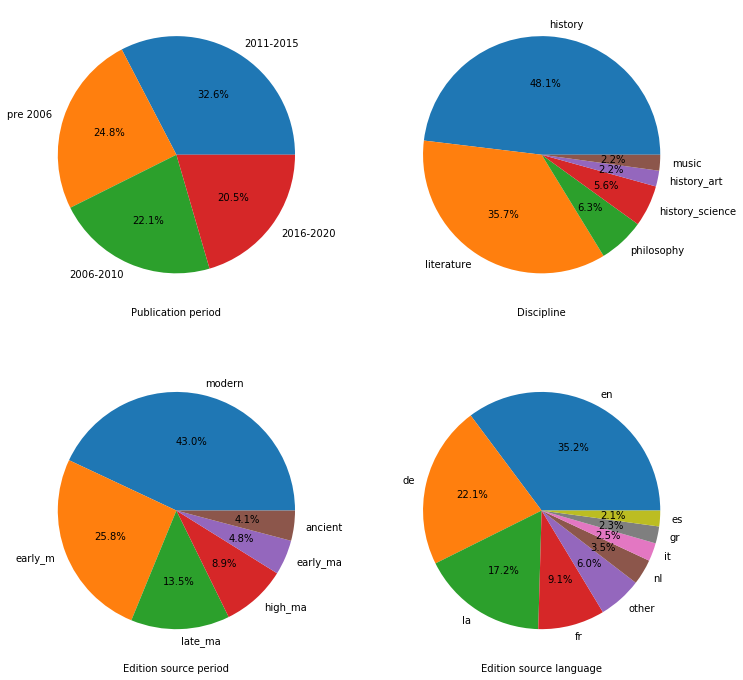

In [54]:
import matplotlib.pyplot as plt

figSize = (12,12)

nrow = 2
ncol = 2

fig, axes = plt.subplots(nrow, ncol)

ax = df_clean["Publication period"].value_counts().plot(kind = 'pie', ax=axes[0,0], figsize=figSize,autopct='%1.1f%%')
ax.set_xlabel("Publication period")
ax.set_ylabel("")
ax = df_clean["Discipline"].value_counts().plot(kind = 'pie', ax=axes[0,1],figsize=figSize, autopct='%1.1f%%')
ax.set_xlabel("Discipline")
ax.set_ylabel("")
ax = df_clean["Edition source period"].value_counts().plot(kind = 'pie', ax=axes[1,0], figsize=figSize, autopct='%1.1f%%')
ax.set_xlabel("Edition source period")
ax.set_ylabel("")
ax = df_clean["Edition source language"].value_counts().plot(kind = 'pie', ax=axes[1,1], figsize=figSize, autopct='%1.1f%%')
ax.set_xlabel("Edition source language")
ax.set_ylabel("")
fig.savefig('fig/fig1_corpus.png', dpi=300, bbox_inches='tight')

## Citation recommendation (explicitly indicated)

In [55]:
#Citation recommendation (explicitly indicated)

df_rec = df_clean.groupby(["Publication period", "Citation recommendation"]).size()

df_rec

Publication period  Citation recommendation
2006-2010           edition                     39
                    granular                    16
                    no                          79
2011-2015           edition                     39
                    granular                    68
                    no                          91
2016-2020           edition                     36
                    granular                    45
                    no                          44
pre 2006            edition                     38
                    granular                    11
                    no                         101
dtype: int64

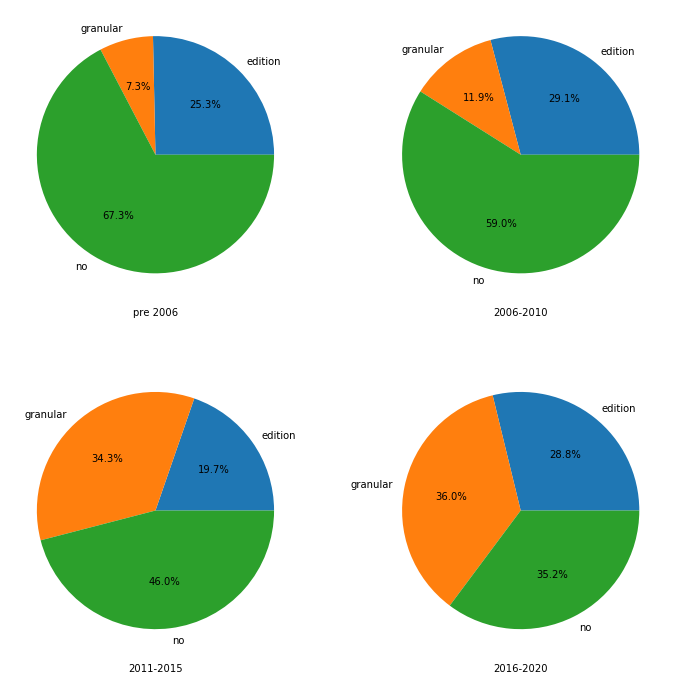

In [56]:
#df_rec = df_clean["Citation recommendation"].str.replace("granular", "yes").str.replace("edition", "yes")
import matplotlib.pyplot as plt

nrow = 2
ncol = 2

fig, axes = plt.subplots(nrow, ncol)

count=0
for r in range(nrow):
    for c in range(ncol):
        ax = df_rec[idx[count]].plot(kind = 'pie',ax=axes[r,c],figsize=figSize, autopct='%1.1f%%')
        ax.set_xlabel(idx[count])
        ax.set_ylabel("")
        count= count + 1
        

fig.savefig('fig/fig2_citationrecommendation_pie.png', dpi=300, bbox_inches='tight')


## Title pages

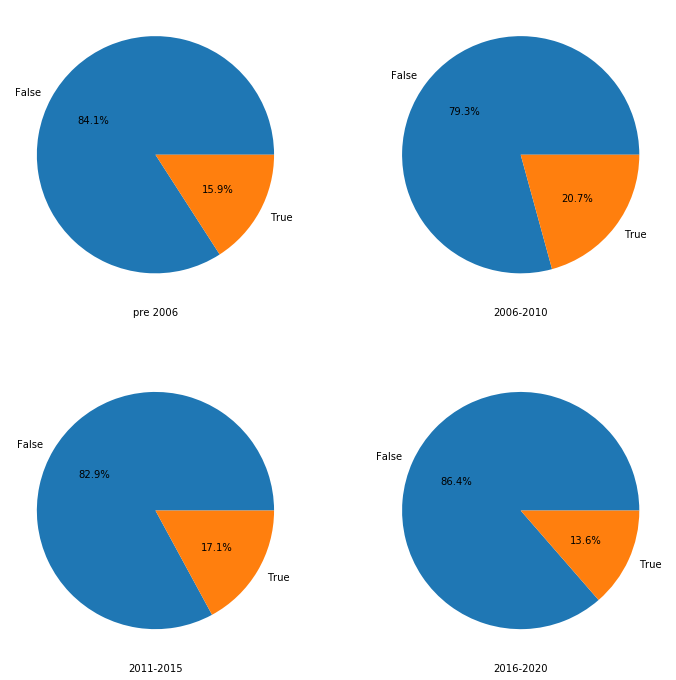

In [57]:
df_title_page = df_clean["Comment"].str.contains("title page", na=False)

df_title_page = df_clean[["Comment", "Publication period"]].assign(Titlepage = df_title_page)

#df_title_page

df_title_page = df_title_page.groupby(["Publication period", "Titlepage"]).size()

#df_title_page.unstack(level="Publication period").plot.pie(subplots=True, figsize=figSize, autopct='%1.1f%%')



nrow = 2
ncol = 2

fig, axes = plt.subplots(nrow, ncol)

count=0
for r in range(nrow):
    for c in range(ncol):
        ax = df_title_page[idx[count]].plot(kind = 'pie',ax=axes[r,c],figsize=figSize, autopct='%1.1f%%')
        ax.set_xlabel(idx[count])
        ax.set_ylabel("")
        count= count + 1


fig.savefig('fig/fig4_title_pages.png', dpi=300, bbox_inches='tight')

## PID/Permalink (explicitly indicated)

In [58]:
df_clean.loc[df_clean["PID/Permalink"]!= "no", "PID/Permalink"] = "yes"

df_pid = df_clean.groupby(["Publication period", "PID/Permalink"]).size()


c:\users\roman\documents\python\rtavenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


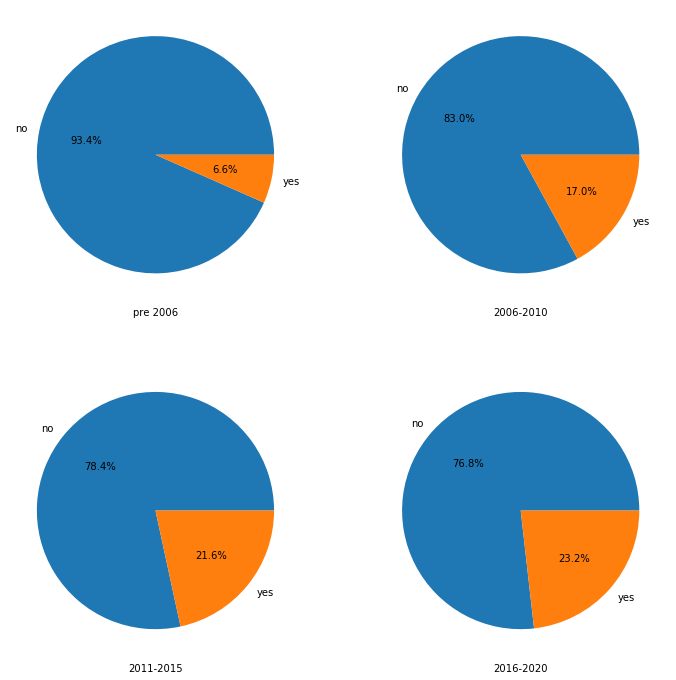

In [59]:
nrow = 2
ncol = 2

fig, axes = plt.subplots(nrow, ncol)

count=0
for r in range(nrow):
    for c in range(ncol):
        ax = df_pid[idx[count]].plot(kind = 'pie',ax=axes[r,c],figsize=figSize, autopct='%1.1f%%')
        ax.set_xlabel(idx[count])
        ax.set_ylabel("")
        count= count + 1
fig.savefig('fig/fig10_pids.png', dpi=300, bbox_inches='tight')

## Version information

In [60]:
#Version information

df_ex = df_clean.groupby(["Publication period", "Version information"]).size()


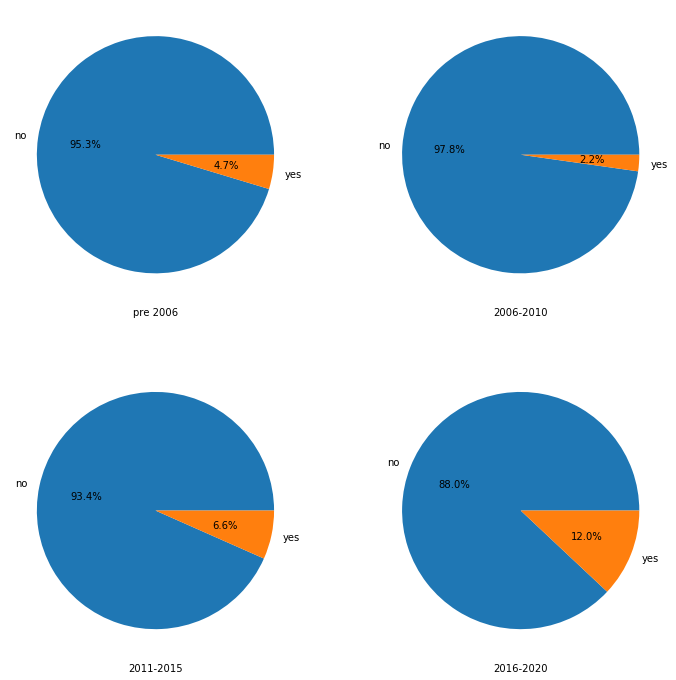

In [61]:
nrow = 2
ncol = 2

fig, axes = plt.subplots(nrow, ncol)

count=0
for r in range(nrow):
    for c in range(ncol):
        ax = df_ex[idx[count]].plot(kind = 'pie',ax=axes[r,c],figsize=figSize, autopct='%1.1f%%')
        ax.set_xlabel(idx[count])
        ax.set_ylabel("")
        count= count + 1
fig.savefig('fig/fig12_versioning.png', dpi=300, bbox_inches='tight')

# Subject/Discipline

## Citation recommendation (explicitly indicated)

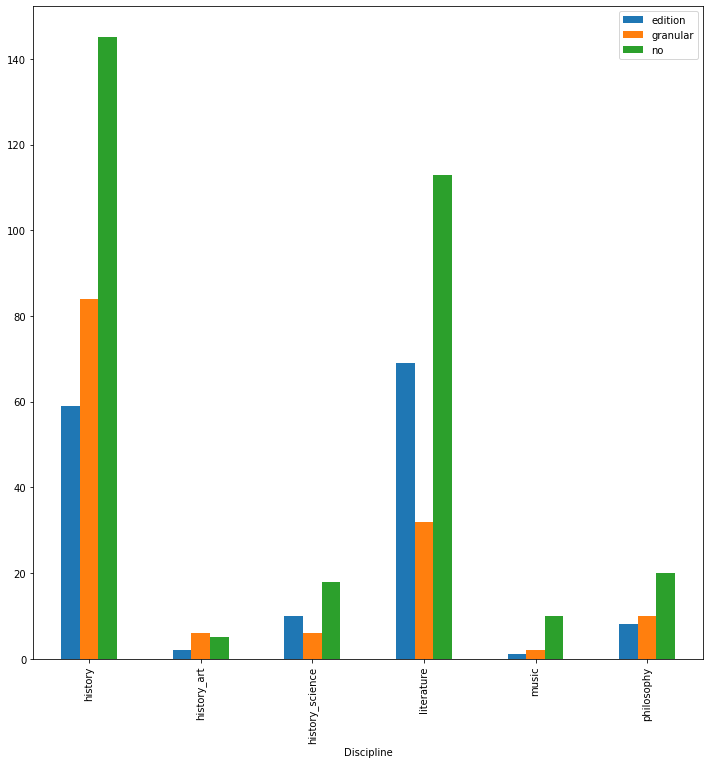

In [62]:
#Citation recommendation (explicitly indicated)

df_rec = df_clean.groupby(["Discipline", "Citation recommendation"]).size()

df_rec

ax = df_rec.unstack(level="Citation recommendation").plot(kind="bar", stacked=False,figsize=figSize)

ax.legend(["edition", "granular", "no"])

## Citation examples

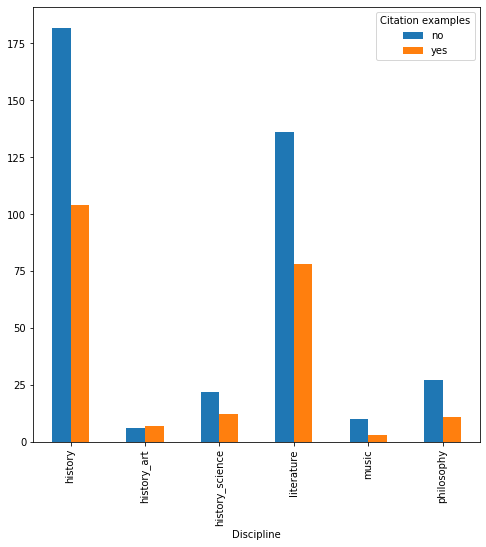

In [63]:
#Citation examples

df_ex = df_clean.groupby(["Discipline", "Citation examples"]).size()

df_ex.unstack(level="Citation examples").plot(kind="bar", stacked=False,figsize=(8,8))

## PID

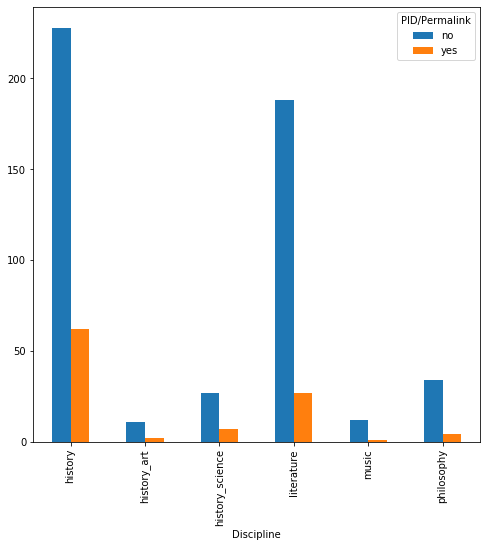

In [64]:
#PID

df_pid = df_clean.groupby(["Discipline", "PID/Permalink"]).size()

ax = df_pid.unstack(level="PID/Permalink").plot(kind="bar", stacked=False,figsize=(8,8))

## Version information

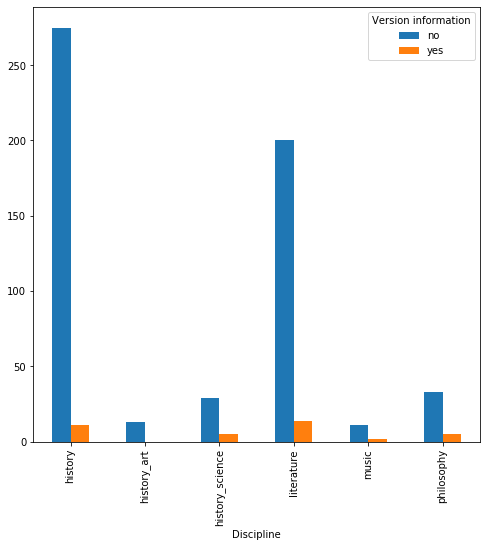

In [65]:
#Version Information

df_subj = df_clean.groupby(["Discipline", "Version information"]).size()

ax = df_subj.unstack(level="Version information").plot(kind="bar", stacked=False,figsize=(8,8))

# Edition source period

## Citation recommendation

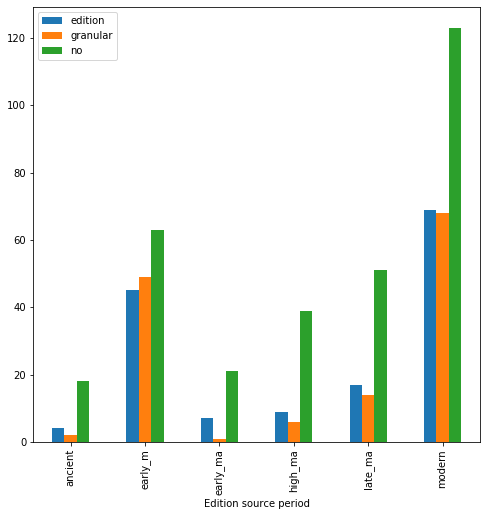

In [66]:
#Citation recommendation (explicitly indicated)

df_rec = df_clean.groupby(["Edition source period", "Citation recommendation"]).size()

ax = df_rec.unstack(level="Citation recommendation").plot(kind="bar", stacked=False,figsize=(8,8))

ax.legend(["edition", "granular", "no"])

## Citation examples

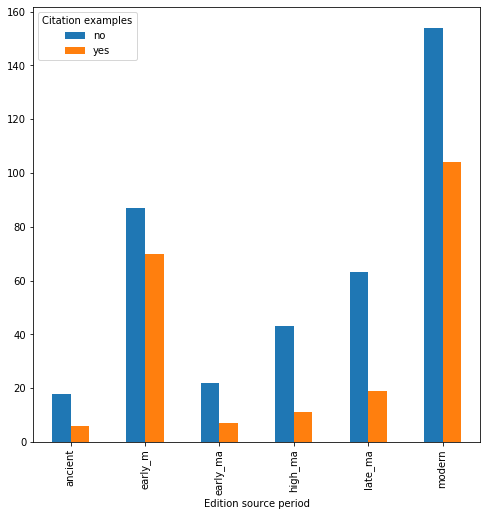

In [67]:
#Citation examples

df_ex = df_clean.groupby(["Edition source period", "Citation examples"]).size()

df_ex.unstack(level="Citation examples").plot(kind="bar", stacked=False,figsize=(8,8))

## PID/Permalink

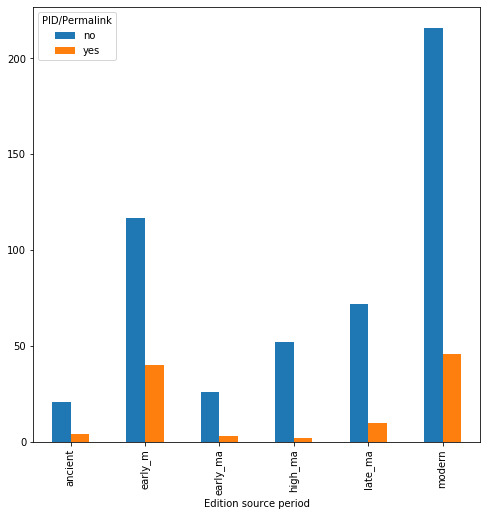

In [68]:
#PID

df_pid = df_clean.groupby(["Edition source period", "PID/Permalink"]).size()

ax = df_pid.unstack(level="PID/Permalink").plot(kind="bar", stacked=False,figsize=(8,8))

## Version information

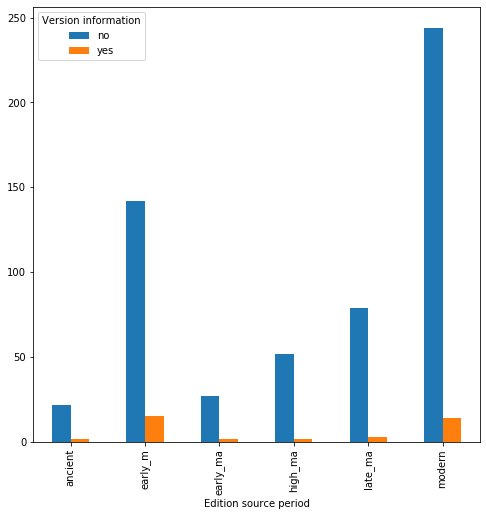

In [69]:
#Version Information

df_subj = df_clean.groupby(["Edition source period", "Version information"]).size()

ax = df_subj.unstack(level="Version information").plot(kind="bar", stacked=False,figsize=(8,8))